# Read The Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

train_df = pd.read_csv('train.csv')
submit_df = pd.read_csv('sample_submission.csv')
med_df = pd.read_csv('med.csv')

med_df["Yıl"] = pd.to_datetime(med_df["Tarih"]).dt.year
med_df["Ay"] = pd.to_datetime(med_df["Tarih"]).dt.month
med_df["Gün"] = pd.to_datetime(med_df["Tarih"]).dt.day

train_df["Yıl"] = pd.to_datetime(train_df["Tarih"]).dt.year
train_df["Ay"] = pd.to_datetime(train_df["Tarih"]).dt.month
train_df["Gün"] = pd.to_datetime(train_df["Tarih"]).dt.day
train_df["Saat"] = pd.to_datetime(train_df["Tarih"]).dt.hour

submit_df["Yıl"] = pd.to_datetime(submit_df["Tarih"]).dt.year
submit_df["Ay"] = pd.to_datetime(submit_df["Tarih"]).dt.month
submit_df["Gün"] = pd.to_datetime(submit_df["Tarih"]).dt.day
submit_df["Saat"] = pd.to_datetime(submit_df["Tarih"]).dt.hour
submit_df["Kesintili Günler"]=0

train_df = train_df.drop("Tarih", axis=1)
submit_df = submit_df.drop("Tarih", axis=1)
med_df = med_df.drop("Tarih", axis=1)

med_df[['Yıl', 'Ay', 'Gün']] = med_df[['Yıl', 'Ay', 'Gün']].astype(int)
train_df['Kesintili Günler'] = train_df.apply(lambda row: int((row[['Yıl', 'Ay', 'Gün']] == med_df[['Yıl', 'Ay', 'Gün']]).all(axis=1).any()), axis=1)

In [ ]:
# # os.chdir("D:\\GDZ\gdz-competition")
# data = pd.read_csv('train.csv' ,parse_dates=['Tarih'])
# data
# # med = pd.read_csv("med.csv")
# # test = pd.read_csv("test.csv")

In [ ]:
# data.shape

In [ ]:
# data.info()

In [ ]:
# future_data = pd.read_csv("future.csv" , parse_dates=['Tarih']).drop('Unnamed: 0' , axis = 1)
# future_data.head()

In [ ]:
# med = pd.read_csv("med.csv" , parse_dates=['Tarih'])
# med.head()

# Feature Engineering

In [3]:
calendar = pd.read_csv('Turkish_calendar.csv',sep=(";"))
new_df = calendar.iloc[853:2557].copy()
new_df.loc[:, "Ay"] = pd.to_datetime(new_df["CALENDAR_DATE"], format="%d.%m.%Y").dt.month
new_df.loc[:, "Yıl"] = pd.to_datetime(new_df["CALENDAR_DATE"], format="%d.%m.%Y").dt.year
new_df = new_df.drop(["SEASON_SK", "SPECIAL_DAY_SK", "SPECIAL_DAY_SK2"], axis=1)

In [4]:
new_df["WEEKEND_FLAG"] =new_df["WEEKEND_FLAG"].replace(["N"],0)
new_df["WEEKEND_FLAG"] =new_df["WEEKEND_FLAG"].replace(["Y"],1)
new_df["RAMADAN_FLAG"] =new_df["RAMADAN_FLAG"].replace(["N"],0)
new_df["RAMADAN_FLAG"] =new_df["RAMADAN_FLAG"].replace(["Y"],1)
new_df["PUBLIC_HOLIDAY_FLAG"] =new_df["PUBLIC_HOLIDAY_FLAG"].replace(["N"],0)
new_df["PUBLIC_HOLIDAY_FLAG"] =new_df["PUBLIC_HOLIDAY_FLAG"].replace(["Y"],1)

In [5]:
new_df.rename(columns={'DAY_OF_MONTH': 'Gün'}, inplace=True)
new_df.rename(columns={'DAY_OF_WEEK_SK': 'Haftanın Günü'}, inplace=True)
new_df.rename(columns={'QUARTER_OF_YEAR': 'Sezon'}, inplace=True)
new_df.rename(columns={'WEEKEND_FLAG': 'Haftasonu - Haftaiçi'}, inplace=True)
new_df.rename(columns={'WEEK_OF_YEAR': 'Yılın kaçıncı haftası'}, inplace=True)
new_df.rename(columns={'RAMADAN_FLAG': 'Ramazan'}, inplace=True)
new_df.rename(columns={'RELIGIOUS_DAY_FLAG_SK': 'Dini Gün'}, inplace=True)
new_df.rename(columns={'NATIONAL_DAY_FLAG_SK': 'Ulusal Gün'}, inplace=True)
new_df.rename(columns={'PUBLIC_HOLIDAY_FLAG': 'Resmi tatil'}, inplace=True)


In [6]:
new_df_submit=new_df.iloc[0:31]
new_df_train=new_df.iloc[31:1704]
merged_df = pd.merge(train_df, new_df_train, on=["Yıl", "Ay", "Gün"])
merged_df2 = pd.merge(submit_df, new_df_submit, on=["Yıl", "Ay", "Gün"])

In [ ]:
# X_test = data.loc[data.Tarih > '2022-03-23 23:00:00'].copy()
# X_train = data.loc[data.Tarih <= '2022-03-23 23:00:00'].copy()

# X = data.copy()

In [ ]:
# all_data = [X_train , X_test , X , future_data , data]

In [ ]:
# from feat_engs import create_datetimes, create_businessDay_cumulativeholidays ,create_electricOutage_timeofDay , create_holiday_weekend , create_hourly_sin_cos , create_outage_rolling_percentages , create_seasons

# for df in all_data :
#     create_datetimes(df)
#     create_holiday_weekend(df)
#     create_businessDay_cumulativeholidays(df)
#     create_electricOutage_timeofDay(df , med)
#     create_hourly_sin_cos(df)
#     create_outage_rolling_percentages(df)
#     create_seasons(df)
#     df.set_index('Tarih' , inplace=True)
#     df.drop('date' , axis = 1 ,inplace=True)

In [ ]:
# from astral.sun import sun
# from astral import LocationInfo
# import pytz

# location_izmir = LocationInfo("Izmir", "Turkey")
# location_izmir.latitude = 38.419200
# location_izmir.longitude = 27.128700
# location_izmir.timezone = pytz.timezone("Turkey")

# location_manisa = LocationInfo("Manisa", "Turkey")
# location_manisa.latitude = 38.612000
# location_manisa.longitude = 27.426000
# location_manisa.timezone = pytz.timezone("Turkey")

# def daylight_hours_izmir(date):
#     s = sun(location_izmir.observer, date=date)
#     daylight_duration = (s['sunset'] - s['sunrise']).seconds / 3600
#     return daylight_duration

# def daylight_hours_manisa(date):
#     s = sun(location_manisa.observer, date=date)
#     daylight_duration = (s['sunset'] - s['sunrise']).seconds / 3600
#     return daylight_duration

# for dataset in all_data :
#     dataset['Daylight_hours_Izmir'] = dataset['Tarih'].apply(daylight_hours_izmir)
#     dataset['Daylight_hours_Manisa'] = dataset['Tarih'].apply(daylight_hours_manisa)
#     dataset

# Train | Test Split

In [8]:
X=merged_df.drop("Dağıtılan Enerji (MWh)", axis=1)
X=X.drop("CALENDAR_DATE", axis=1)
y=merged_df["Dağıtılan Enerji (MWh)"]
predict=merged_df2.drop("Dağıtılan Enerji (MWh)", axis=1)
predict=predict.drop("CALENDAR_DATE", axis=1)

In [9]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

# Modelling

# Randomized Search XGB

In [ ]:
# from xgboost import XGBRegressor

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer, mean_absolute_percentage_error

# base_model = XGBRegressor(tree_method = 'gpu_hist')

# params = {
#     'n_estimators': np.arange(1000, 3000, 50),
#     'learning_rate': np.logspace(-4, 0, 40),
#     'max_depth': np.arange(2, 15),
#     'subsample': np.arange(0.1, 1.1, 0.1),
#     'colsample_bytree': np.arange(0.1, 1.1, 0.1),
#     # 'min_child_weight': np.arange(1, 21),
#     'gamma': np.arange(0, 10),
# }

# mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
# random_search = RandomizedSearchCV(base_model, param_distributions= params, n_iter= 20, cv= 3, scoring= mape_scorer , random_state= 53)
# random_search.fit(X , y)

# print(f"""
#       En iyi XGB parametreleri : {random_search.best_params_}
#       En iyi mape skorumuz : {-random_search.best_score_}
#       """)

In [ ]:
# y_pred = random_search.predict(X_test)

# print(f"""
#       Validation Mape Score : {mean_absolute_percentage_error(X_test['Dağıtılan Enerji (MWh)'], y_pred)}
#       """)

In [ ]:
# eval_metrics(y_test,y_pred)

# Modelling Time

In [31]:
xgb_deneme = XGBRegressor(tree_method='gpu_hist' , n_estimators=3000 , max_depth = 7 , learning_rate = 0.01 , gamma= 1 , colsample_bytree = 0.6 , subsample=0.6)

In [32]:
xgb_deneme.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
# Test seti üzerinde tahmin yapma
y_pred = xgb_deneme.predict(X_test)

# Hata ölçeğini MAPE olarak hesaplama
mape = mean_absolute_percentage_error(y_test, y_pred)

# MAPE değerini yazdırma
print('MAPE: ',format(mape * 100))

MAPE:  2.0500809771182857


# Final Model 

In [34]:
xgb = XGBRegressor(tree_method='gpu_hist' , n_estimators=3000 , max_depth = 7 , learning_rate = 0.01 , gamma= 1 , colsample_bytree = 0.6 , subsample=0.6)

In [35]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
# Test seti üzerinde tahmin yapma
y_pred = xgb.predict(X_test)

# Hata ölçeğini MAPE olarak hesaplama
mape = mean_absolute_percentage_error(y_test, y_pred)

# MAPE değerini yazdırma
print('MAPE: ',format(mape * 100))

MAPE:  1.8171652266602094


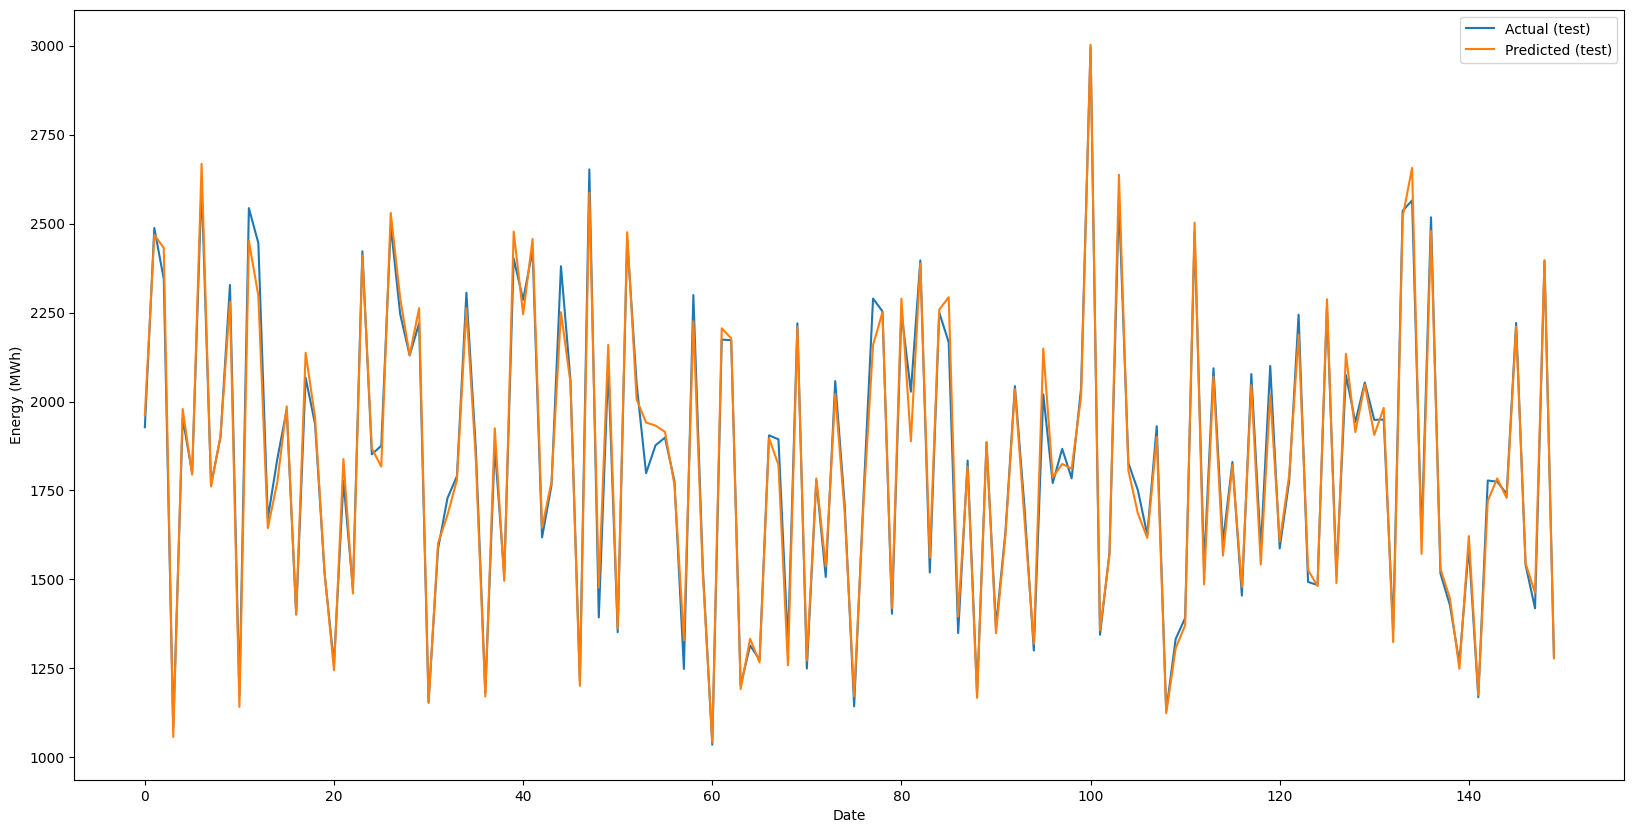

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
# Tahminleri ve gerçek değerleri görselleştir
plt.plot(predict.index[:150], y_test[:150], label='Actual (test)')
plt.plot(predict.index[:150], y_pred[:150], label='Predicted (test)')

plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.legend()
plt.show()

# Predictions

In [38]:
from eval_metrics import preds_plot

In [39]:
y_pred_final = xgb.predict(predict)
y_pred_final[:10]

array([2203.573 , 2070.5186, 1944.6104, 1880.4321, 1841.8335, 1819.2837,
       1790.9777, 1911.9324, 2285.304 , 2593.029 ], dtype=float32)

In [40]:
future_data= pd.read_csv('sample_submission.csv')
future_data["Dağıtılan Enerji (MWh)"]=y_pred_final
submit_data = future_data.copy()

In [41]:
future_data = future_data.set_index('Tarih', drop=True)
future_data.index = future_data.index.astype('datetime64')
future_data

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,2203.572998
2022-08-01 01:00:00,2070.518555
2022-08-01 02:00:00,1944.610352
2022-08-01 03:00:00,1880.432129
2022-08-01 04:00:00,1841.833496
...,...
2022-08-31 19:00:00,2535.226074
2022-08-31 20:00:00,2532.713623
2022-08-31 21:00:00,2454.817139


In [43]:
data = pd.read_csv('train.csv' , parse_dates=['Tarih'] , index_col='Tarih')
data

,Dağıtılan Enerji (MWh)
Tarih,
2018-01-01 00:00:00,1593.944216
2018-01-01 01:00:00,1513.933887
2018-01-01 02:00:00,1402.612637
2018-01-01 03:00:00,1278.527266
2018-01-01 04:00:00,1220.697701
...,...
2022-07-31 19:00:00,2492.489498
2022-07-31 20:00:00,2479.958245
2022-07-31 21:00:00,2485.016884


In [45]:
target_data = data[data.index.month == 8]
target_data

,Dağıtılan Enerji (MWh)
Tarih,
2018-08-01 00:00:00,2106.796778
2018-08-01 01:00:00,1936.871633
2018-08-01 02:00:00,1808.523094
2018-08-01 03:00:00,1725.237068
2018-08-01 04:00:00,1680.685169
...,...
2021-08-31 19:00:00,2538.809761
2021-08-31 20:00:00,2572.939106
2021-08-31 21:00:00,2484.682803


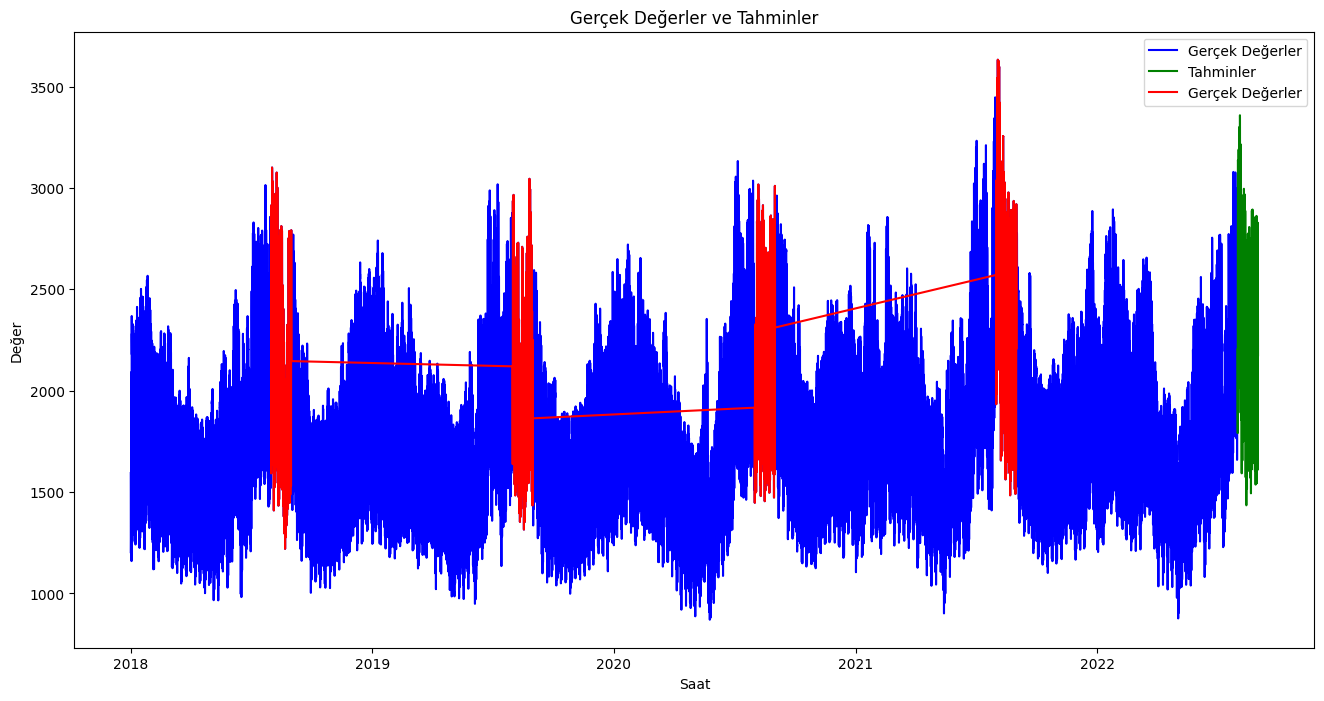

In [46]:
plt.figure(figsize= ( 16 , 8))

preds_plot(data , future_data , target_data)

In [49]:
submit_data['Tarih'] = submit_data['Tarih'].astype('datetime64')
submit_data

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2203.572998
1,2022-08-01 01:00:00,2070.518555
2,2022-08-01 02:00:00,1944.610352
3,2022-08-01 03:00:00,1880.432129
4,2022-08-01 04:00:00,1841.833496
...,...,...
739,2022-08-31 19:00:00,2535.226074
740,2022-08-31 20:00:00,2532.713623
741,2022-08-31 21:00:00,2454.817139
742,2022-08-31 22:00:00,2314.872803


In [50]:
submit_data

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2203.572998
1,2022-08-01 01:00:00,2070.518555
2,2022-08-01 02:00:00,1944.610352
3,2022-08-01 03:00:00,1880.432129
4,2022-08-01 04:00:00,1841.833496
...,...,...
739,2022-08-31 19:00:00,2535.226074
740,2022-08-31 20:00:00,2532.713623
741,2022-08-31 21:00:00,2454.817139
742,2022-08-31 22:00:00,2314.872803


In [48]:
submit_data.to_csv("XGB-3000-maxd7-lr001-gamma1-colsamp0.6-subsamp0.6.csv",index=None)

In [52]:
sıkıntılı_df = pd.read_csv(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Denenecekler\XGB-3000-maxd7-lr001-gamma1-colsamp0.6-subsamp0.6.csv')
sıkıntılı_df.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2203.5730
1,2022-08-01 01:00:00,2070.5186
2,2022-08-01 02:00:00,1944.6104
3,2022-08-01 03:00:00,1880.4321
4,2022-08-01 04:00:00,1841.8335


In [ ]:
# Done